# Mini Lab: SVM and Logistic Regression Modeling

### Teammates: Chad Kwong, Erin McClure-Price, Alex Lopez, Chris Haub

## Initial loading of dataset and all related packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import linear_model
from sklearn import svm

#Suppress futurewarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Set Figure Size
plt.rcParams["figure.figsize"] = (20,10)



#Import Dataset from github repo
bankData = pd.read_csv('bank-additional-full.csv', sep=';', na_values="unknown")
#Optional: Add in index column
#bankData.insert(0, 'Sample_ID', range(1,len(bankData)+1))

#Creating variables for indexing continuous and categorical variables
conCol = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
          'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
catCol = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
          'contact', 'month', 'day_of_week', 'poutcome', 'y']

In [2]:
bankData2 = bankData.dropna()
#remove 'default' column
bankData2.drop(['default'], axis=1)
bankData2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# checked for missing values, no missing values
bankData2.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
bankData2.shape

(30488, 21)

## Building Model

In [5]:
#model = linear_model.Regression()
#model.fit(bankData, )

In [6]:
#define the target variable
y = bankData2.y
y.head()

0    no
2    no
3    no
4    no
6    no
Name: y, dtype: object

In [7]:
# one hot encoding of ALL categorical variables

# pd.concat([*]], axis=1) // this line of code concatenates all the data frames in the [*] list
# [** for col in categ_features] // this steps through each feature in categ_features and 
#                                //   creates a new element in a list based on the output of **
# pd.get_dummies(df_imputed[col],prefix=col) // this creates a one hot encoded dataframe of the variable=col (like code above)

categ_features = ['job','marital','education','default','housing','loan','contact','month','poutcome'];

OneHotDF = pd.concat([pd.get_dummies(bankData2[col],prefix=col,drop_first=True) for col in categ_features], axis=1)

OneHotDF.head()

#https://github.com/jakemdrew/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_nonexistent,poutcome_success
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [8]:
OneHotDF.columns

Index(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

In [9]:
# pandas.pop
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pop.html
Y = bankData2.pop("y")

In [10]:
# merged OneHotDF and bankData files

X = pd.concat([bankData2.select_dtypes(exclude='object'),OneHotDF],axis=1)
XColumns = pd.concat([bankData2.select_dtypes(exclude='object'),OneHotDF], axis=0).columns

In [11]:
#separating input data into two parts X (features) and Y (target)
# features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
#           'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job', 'marital', 'education', 'default', 'housing', 'loan', 
#           'contact', 'month', 'day_of_week', 'poutcome']
# # Separating out the features
# X = mergedDF.loc[:, features].values

# #Separating out the target
# Y = mergedDF.loc[:, ['y']].values.ravel()
# Y.shape

In [12]:
Y.shape
X.shape

(30488, 43)

## Training and Testing Split

In [13]:
#Building a logistic regression model with default values for parameters

#apply cross validation, using 80/20 train/test splitting
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=2, test_size=0.20, random_state=0)

#apply standard scaling: to yield standard normally distributed data
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()

#apply logistic regression
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()

X_train_scaled = scl_obj.fit_transform(X) # apply to training
    
    

regEstimator.fit(X_train_scaled, Y)  # train object

LogisticRegression()

In [14]:
# Separating out the features
X = X.values
X.shape
#Separating out the target
Y = Y.values.ravel()
Y.shape

(30488,)

In [15]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2)

## Logistic Regression

In [16]:
#Building a logistic regression model with default values for parameters

#apply cross validation, using 80/20 train/test splitting
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=2, test_size=0.20, random_state=0)

#apply standard scaling: to yield standard normally distributed data
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()

from sklearn import metrics as mt
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#apply logistic regression
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv.split(X,Y): 
    X_train = X[train_indices]
    Y_train = Y[train_indices]
    
    X_test = X[test_indices]
    Y_test = Y[test_indices] 
    
    X_train_scaled = scl_obj.fit_transform(X_train) # apply to training
    X_test_scaled = scl_obj.transform(X_test) 
    
    regEstimator.fit(X_train_scaled, Y_train)  # train object
    y_hat = regEstimator.predict(X_test_scaled) # get test set precitions
    acc = mt.accuracy_score(Y_test,y_hat)
    conf = mt.confusion_matrix(Y_test,y_hat)
    print("====Iteration",iter_num," ====")
    print('accuracy:', acc )
    print("confusion matrix\n",conf)
    #print(conf)
    iter_num+=1
    
# Also note that every time you run the above code
#   it randomly creates a new training and testing set, 
#   so accuracy will be different each time
    

# https://github.com/jakemdrew/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb


/Users/chadkwong/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


====Iteration 0  ====
accuracy: 0.9017710724827812
confusion matrix
 [[5172  178]
 [ 421  327]]
====Iteration 1  ====
accuracy: 0.9034109544112824
confusion matrix
 [[5166  160]
 [ 429  343]]


## Interpretting weights

In [17]:
# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object


# train the reusable logisitc regression model on the training data
lr_clf.fit(X_train,Y_train)  # train object
y_hat = lr_clf.predict(X_test) # get test set precitions

# interpret the weights

# iterate over the coefficients
weights = lr_clf.coef_.T # take transpose to make a column vector
variable_names = bankData2.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
# does this look correct? 

age has weight of 0.0029935167943839023
job has weight of 0.004524379826722064
marital has weight of -0.0497907369077171
education has weight of -0.0016520765943134385
default has weight of -0.15773391238800266
housing has weight of -0.26297089635945875
loan has weight of 0.3457759098631551
contact has weight of 0.023618001879698255
month has weight of -0.21426656003986816
day_of_week has weight of -0.006399511158191971
duration has weight of -0.12734943212771677
campaign has weight of -0.019228265991040532
pdays has weight of 0.0025566369103869986
previous has weight of 0.01400562311608565
poutcome has weight of 0.06452989655081218
emp.var.rate has weight of -0.0010876722990246829
cons.price.idx has weight of -0.043640073354850976
cons.conf.idx has weight of 0.04004979350710377
euribor3m has weight of 0.019071001067514425
nr.employed has weight of 0.004740544840706198


These weight interpretations are not neccessarily interpretable because of the values we had. Very large attribute values could just as easily be assigned a higher weight. Instead, let's normalize the feature values so that all the attributes are on the same dynamic range. Once we normalize the attributes, the weights should have magnitudes that reflect their poredictive power in the logistic regression model.

In [18]:
from sklearn.preprocessing import StandardScaler

# we want to normalize the features based upon the mean and standard deviation of each column. 
# However, we do not want to accidentally use the testing data to find out the mean and std (this would be snooping)
# to Make things easier, let's start by just using whatever was last stored in the variables:
##    X_train , y_train , X_test, y_test (they were set in a for loop above)

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std
# the line of code above only looks at training data to get mean and std and we can use it 
# to transform new feature data

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05, solver='liblinear') # get object, the 'C' value is less (can you guess why??)
lr_clf.fit(X_train_scaled,Y_train)  # train object

y_hat = lr_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(Y_test,y_hat)
conf = mt.confusion_matrix(Y_test,y_hat)
print('accuracy:', acc )
print(conf )

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,bankData2.columns) # combine attributes
zip_vars = sorted(zip_vars)
for coef, name in zip_vars:
    print(name, 'has weight of', coef[0]) # now print them out

accuracy: 0.9025910134470319
[[5166  160]
 [ 434  338]]
housing has weight of -1.2101311757986828
day_of_week has weight of -0.30982894782325293
education has weight of -0.19779145132584777
marital has weight of -0.09421066769672895
duration has weight of -0.07948796003510064
cons.price.idx has weight of -0.039411957320554636
default has weight of -0.03887986224132142
campaign has weight of -0.026317928291100617
age has weight of -0.024767656952667565
emp.var.rate has weight of -0.01126730406961087
nr.employed has weight of -0.001050756806464229
euribor3m has weight of 0.002811206301125258
previous has weight of 0.014187588554151557
pdays has weight of 0.01815762463685661
cons.conf.idx has weight of 0.029261904839449286
contact has weight of 0.058323020869565985
poutcome has weight of 0.08318584797280619
month has weight of 0.14899981635692824
loan has weight of 0.4826115233716718
job has weight of 1.1548816917736084


## Look at code below

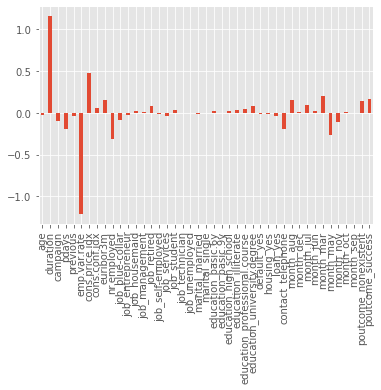

In [28]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


weights = pd.Series(lr_clf.coef_[0],index=XColumns)
weights.plot(kind='bar')
plt.show()

In [20]:
print(len(lr_clf.coef_[0]))

43


## Support Vector Machines

In [21]:
# okay, so run through the cross validation loop and set the training and testing variable for one single iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = Y[train_indices]
    
    X_test = X[test_indices]
    y_test = Y[test_indices]
    
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

# https://github.com/jakemdrew/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb

In [22]:
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import SVC

# train the model just as before
svm_clf = SVC(C=0.5, kernel='rbf', degree=3, gamma='auto') # get object
svm_clf.fit(X_train_scaled, y_train)  # train object

y_hat = svm_clf.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

accuracy: 0.9017710724827812
[[5216  139]
 [ 460  283]]


In [23]:
# look at the support vectors
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_ )

(5965, 43)
(5965,)
[3116 2849]


## Need to add weights section below here for code below to run

In [24]:
# if using linear kernel, these make sense to look at (not otherwise, why?)
# print(svm_clf.coef_)
# weights = pd.Series(svm_clf.coef_[0],index=df_imputed.columns)
# weights.plot(kind='bar')

In [25]:
# Now let's do some different analysis with the SVM and look at the instances that were chosen as support vectors

# now lets look at the support for the vectors and see if we they are indicative of anything
# grabe the rows that were selected as support vectors (these are usually instances that are hard to classify)

# make a dataframe of the training data
df_tested_on = bankData2.iloc[train_indices].copy() # saved from above, the indices chosen for training
# now get the support vectors from the trained model
df_support = bankData2.iloc[svm_clf.support_,:].copy()

df_support["y"] = Y[svm_clf.support_] # add back in the 'Yes' Column to the pandas dataframe
bankData2["y"] = Y # also add it back in for the original data
df_support.info()

# https://github.com/jakemdrew/DataMiningNotebooks/blob/master/04.%20Logits%20and%20SVM.ipynb

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5965 entries, 14 to 34122
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5965 non-null   int64  
 1   job             5965 non-null   object 
 2   marital         5965 non-null   object 
 3   education       5965 non-null   object 
 4   default         5965 non-null   object 
 5   housing         5965 non-null   object 
 6   loan            5965 non-null   object 
 7   contact         5965 non-null   object 
 8   month           5965 non-null   object 
 9   day_of_week     5965 non-null   object 
 10  duration        5965 non-null   int64  
 11  campaign        5965 non-null   int64  
 12  pdays           5965 non-null   int64  
 13  previous        5965 non-null   int64  
 14  poutcome        5965 non-null   object 
 15  emp.var.rate    5965 non-null   float64
 16  cons.price.idx  5965 non-null   float64
 17  cons.conf.idx   5965 non-null  

<ipython-input-25-f8a1871b9863>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankData2["y"] = Y # also add it back in for the original data


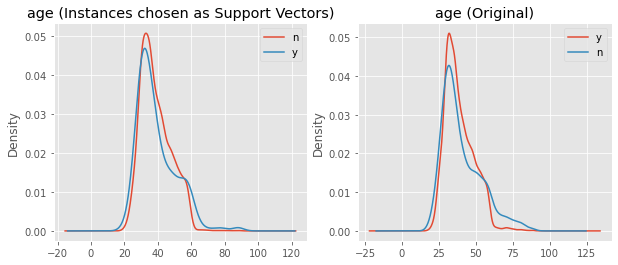

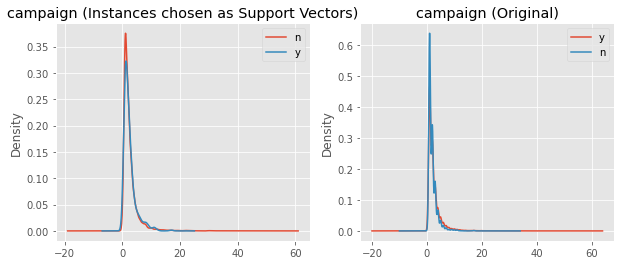

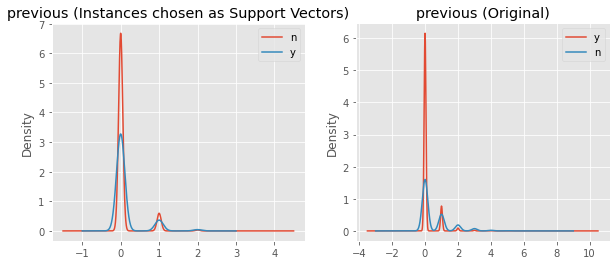

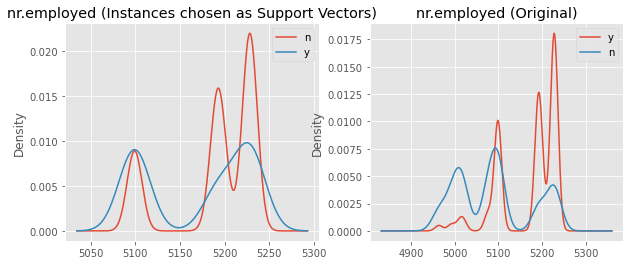

In [26]:
# now lets see the statistics of these attributes
from pandas.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(["y"])
df_grouped = bankData2.groupby(["y"])

# plot KDE of Different variables
vars_to_plot = ['age','campaign','previous','nr.employed']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(["n","y"])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['y','n'])
    plt.title(v+' (Original)')
    


You can also look at joint plots of the data and see how relationships have changed. 
**(Hint hint for the min-lab assignment--this would be a nice analysis of the support vectors.)**

In [27]:
## Evaluating Model